Assignment 4 Naive Bayes Classifier

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score,confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report)
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [4]:
data= pd.read_csv("4.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
data.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [6]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [7]:
data.tail()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


<Axes: xlabel='not.fully.paid'>

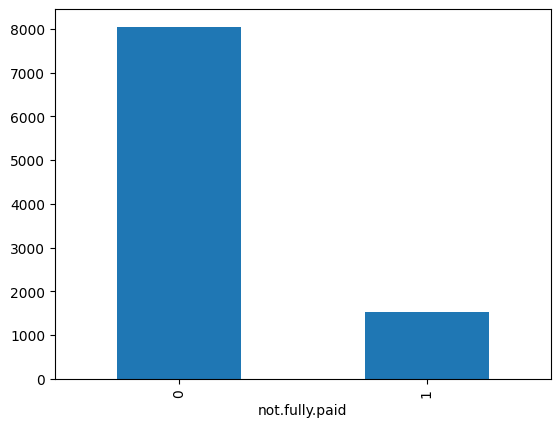

In [12]:
data["not.fully.paid"].value_counts().plot(kind="bar")

In [20]:
x = data.drop("not.fully.paid", axis = 1)
y = data["not.fully.paid"]
x_encoded = pd.get_dummies(x)
x_train, x_test, y_train, y_test = train_test_split(x_encoded,y, test_size = 0.20, random_state = 111)

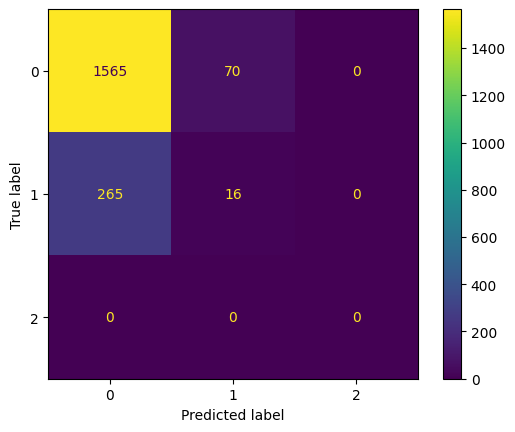

In [27]:
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_pred,y_test)
f1= f1_score(y_pred, y_test, average="weighted")
la= [0,1,2]
cm = confusion_matrix(y_test, y_pred, labels=la)
disp = ConfusionMatrixDisplay(confusion_matrix =cm)
disp.plot()


In [30]:
print("Accuracy", accuracy, "\nF1 Score", f1, "\nConfusion Matrix\n",cm)

Accuracy 0.8251565762004175 
F1 Score 0.8666869679936183 
Confusion Matrix
 [[1565   70    0]
 [ 265   16    0]
 [   0    0    0]]


In [37]:
data_pred= pd.DataFrame({"actual":y_test, "predicted": y_pred})

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.90      1635
           1       0.19      0.06      0.09       281

    accuracy                           0.83      1916
   macro avg       0.52      0.51      0.50      1916
weighted avg       0.76      0.83      0.78      1916



In [39]:
print(accuracy_score(y_test,y_pred))

0.8251565762004175


The `make_classification` function in scikit-learn is used to generate a synthetic classification dataset with specified characteristics. Let's break down each parameter:

- `n_features`: This parameter determines the number of features (or independent variables) in the dataset. Each feature is generated independently according to specific rules. In this case, `n_features=6` means there will be 6 features in the dataset.

- `n_classes`: This parameter determines the number of classes (or target variable categories) in the dataset. Each class corresponds to a unique value of the target variable. In this case, `n_classes=3` means there will be 3 classes.

- `n_samples`: This parameter determines the number of samples (or data points) in the dataset. Each sample consists of values for all features and a corresponding target variable value. In this case, `n_samples=800` means there will be 800 data points in the dataset.

- `n_informative`: This parameter determines the number of informative features, i.e., the number of features that are used to generate the target variable. These are the features that have a relationship with the target variable. In this case, `n_informative=2` means there will be 2 informative features.

- `random_state`: This parameter is used to set the random seed, ensuring reproducibility of the generated dataset. By fixing the random seed, you'll get the same dataset each time you run the code with the same parameters.

- `n_clusters_per_class`: This parameter determines the number of clusters per class. It specifies the number of clusters around each class mean. In this case, `n_clusters_per_class=1` means each class will have one cluster.

Here's an explanation of what the function returns:

- `X`: This is a 2D NumPy array containing the features of the generated dataset. It has a shape of `(n_samples, n_features)`, where `n_samples` is the number of data points and `n_features` is the number of features.

- `y`: This is a 1D NumPy array containing the target variable values (class labels) of the generated dataset. It has a shape of `(n_samples,)`, where `n_samples` is the number of data points.

In summary, the `make_classification` function generates a synthetic classification dataset with specified characteristics, which is useful for testing and prototyping machine learning algorithms.